# In-Depth Exploratory Data Analysis

This notebook aims to have a more detailed look at the distribution of the data at hand.
We will plot the monthly summed sales of all the shops *(60 in total)*
and different item categories *(84 in total)* present.

## Prerequisites

#### Package imports

In [1]:
# defaults
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# my packages
import src.plotting.Defaults
from src.datacleaning.ConvertingDateValues import date_to_month

#### Import data

In [2]:
df_train = pd.read_csv('data/technical/sales_train.csv', parse_dates=['date'], dayfirst=True)
df_shops = pd.read_csv("data/info/shops.csv")
df_items = pd.read_csv("data/info/items.csv")

#### Settings

In [3]:
src.plotting.Defaults.set_defaults()

#### Date formatting

In [4]:
date_to_month(df_train);

## Close inspection of the monthly sales

### Prepare the data

#### Sum the monthly sales per shop

In [5]:
df_all_sales = pd.DataFrame(df_train, columns=['date', 'item_cnt_day'])
df_all_sales_per_shop = pd.DataFrame(df_train, columns=['date', 'item_cnt_day', 'shop_id'])
df_all_sales_per_shop.set_index(['date', 'shop_id'], inplace=True)

df_all_sales_per_shop_summed = df_all_sales_per_shop.groupby(['date', 'shop_id']).sum()
df_all_sales_per_shop_summed = df_all_sales_per_shop_summed.swaplevel(i='shop_id', j='date')
df_all_sales_per_shop_summed.rename(columns = {'item_cnt_day':'item_cnt_month'}, inplace = True)

##### Define the plotting function

In [6]:
def plot_all_sales_per_shop():
    plt.rcParams['figure.figsize'] = [8, 3]  # shouldnt be done like that but it works, not sure why

    # print all the graphs

    df = df_all_sales_per_shop_summed
    df.reset_index(inplace=True, level=['shop_id'])
    # print(df.head())
    # print(df.shape)

    # df_this_shop = df.loc[df['shop_id'] == 52]
    # print(df_this_shop)
    for shop in df_shops['shop_id']:
        df_this_shop = df.loc[df['shop_id'] == shop]
        df_this_shop = df_this_shop.drop(['shop_id'], axis=1)
        plot = df_this_shop.plot()
        plot.set_title(f"Shop Nr. {shop}")
        # print(df_this_shop)


#### Sum the monthly sales per item category

In [7]:
# create new dataframe and merge with item info to get the item category id
df_all_sales_per_category = pd.DataFrame(df_train, columns=['date', 'item_cnt_day', 'item_id'])
df_all_sales_per_category = df_all_sales_per_category.set_index('item_id').join(df_items.set_index('item_id'))
df_all_sales_per_category = df_all_sales_per_category.drop(['item_name'], axis=1)
df_all_sales_per_category = df_all_sales_per_category.reset_index()
df_all_sales_per_category = df_all_sales_per_category.drop(['item_id'], axis=1)
df_all_sales_per_category.rename(columns = {'item_cnt_day':'item_cnt_month'}, inplace = True)

# sum up all items sold in function of the item category and the month
df_all_sales_per_category.set_index(['date', 'item_category_id'], inplace=True)
df_all_sales_per_category_summed = df_all_sales_per_category.groupby(['date', 'item_category_id']).sum()

# remove the duplicates and re-sort a new item category df
df_item_categories = df_items['item_category_id']
df_item_categories = df_item_categories.drop_duplicates()
df_item_categories = df_item_categories.sort_values()

##### Define the plotting function

In [8]:
def plot_all_sales_per_category():
    # remove the no longer used index in the df
    df = df_all_sales_per_category_summed
    df.reset_index(inplace=True, level=['item_category_id'])

    for category in df_item_categories:
        df_this_category = df.loc[df['item_category_id'] == category]
        df_this_category = df_this_category.drop(['item_category_id'], axis=1)
        plot = df_this_category.plot()
        plot.set_title(f"Item Category: {category}")

### Plot the data

#### Sales per item category

/Users/ced/opt/miniconda3/envs/rp/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


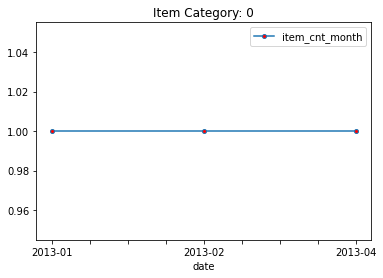

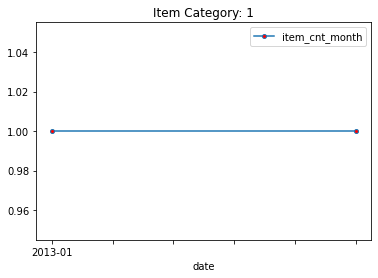

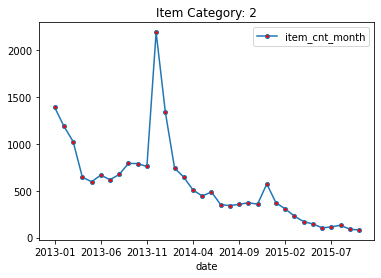

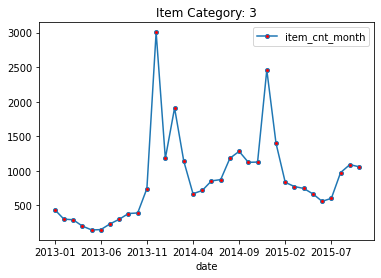

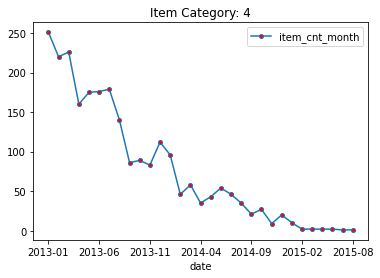

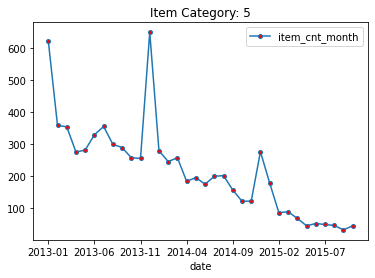

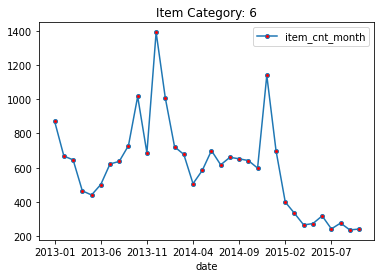

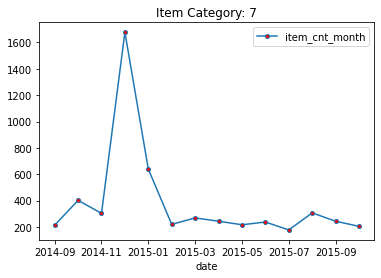

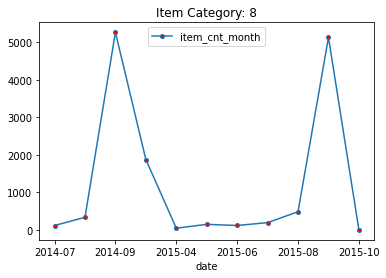

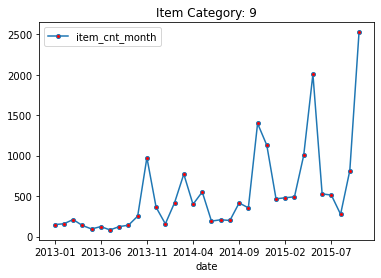

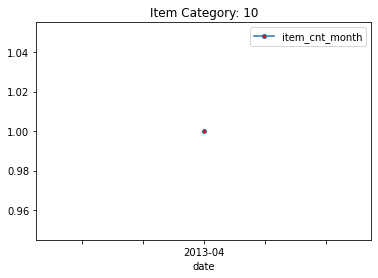

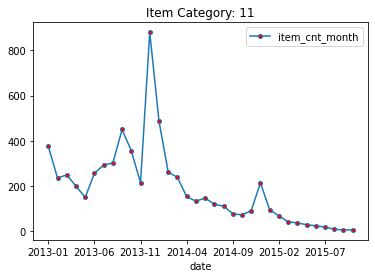

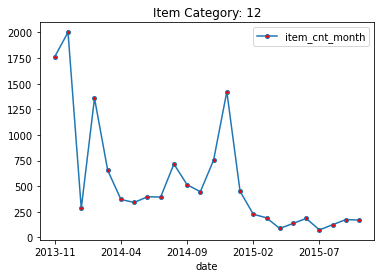

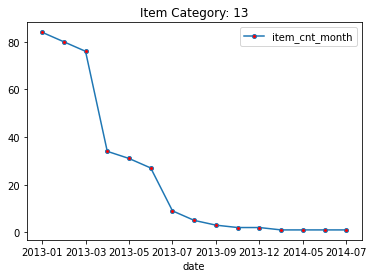

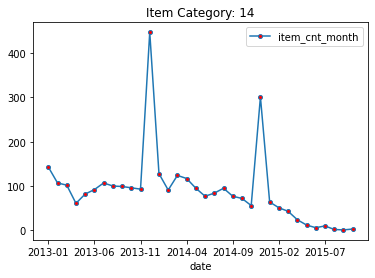

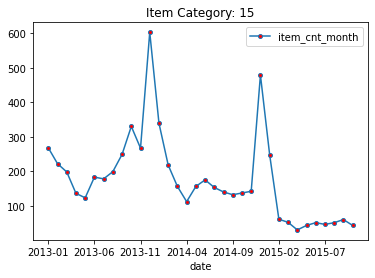

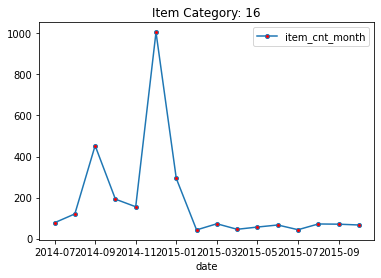

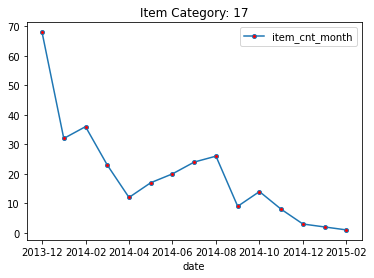

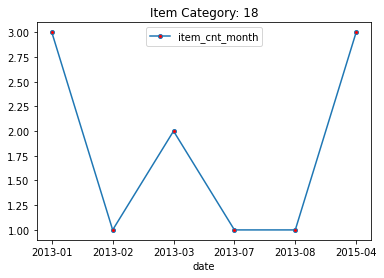

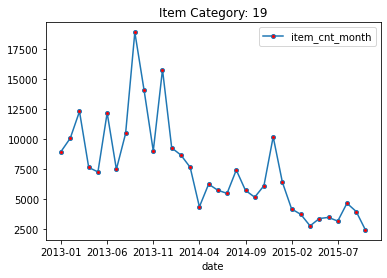

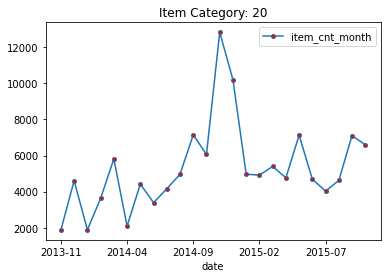

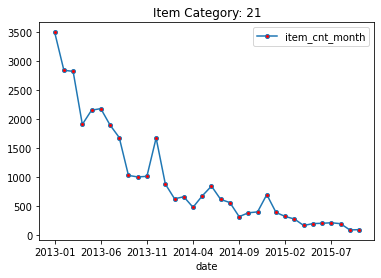

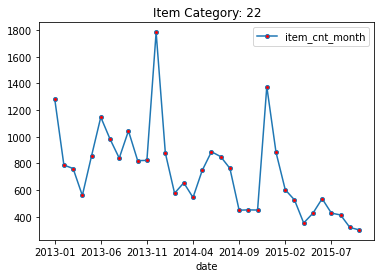

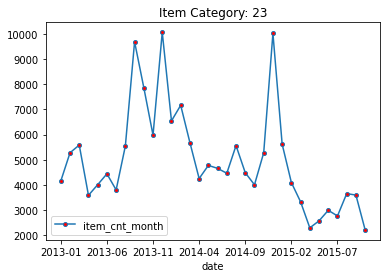

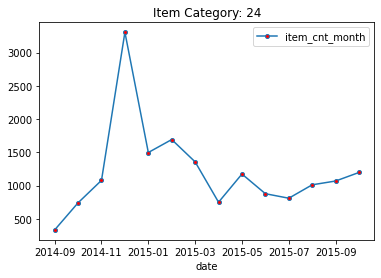

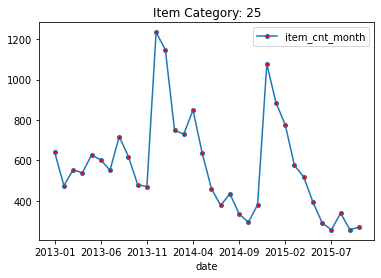

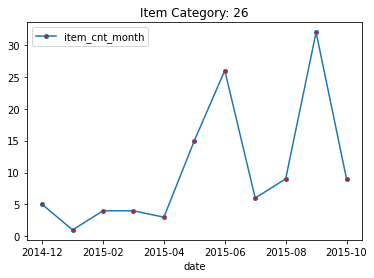

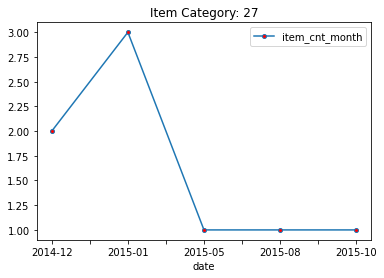

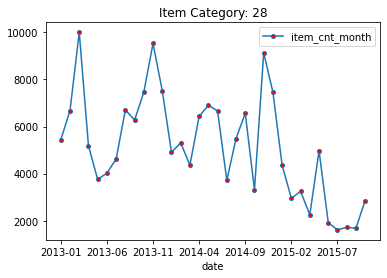

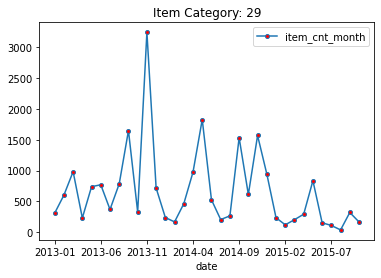

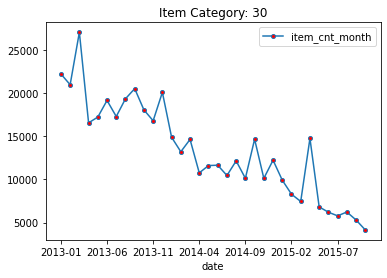

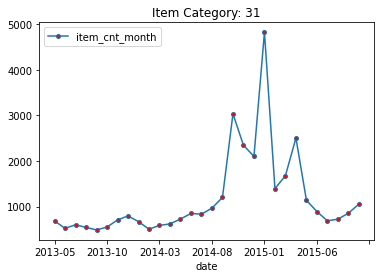

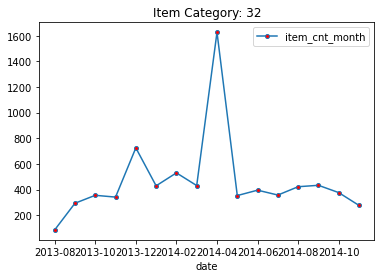

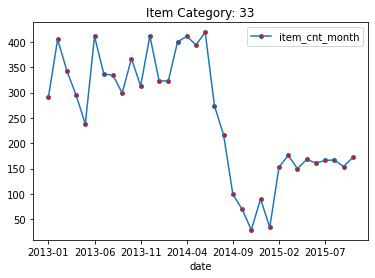

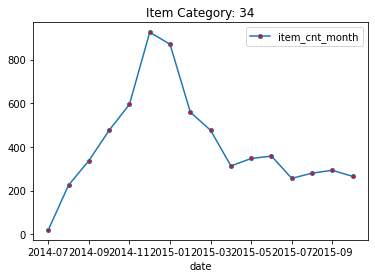

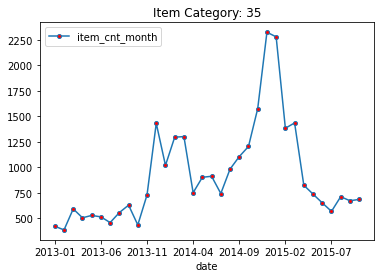

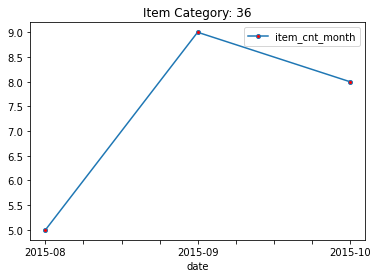

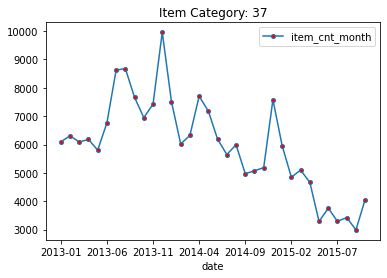

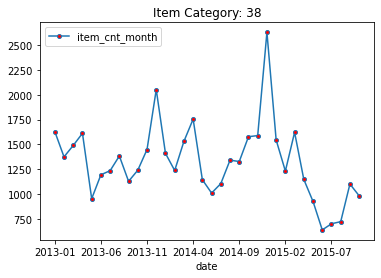

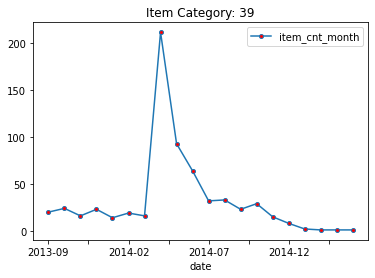

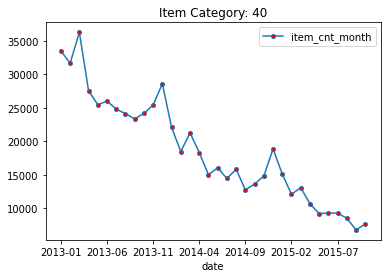

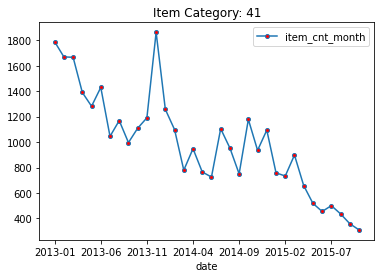

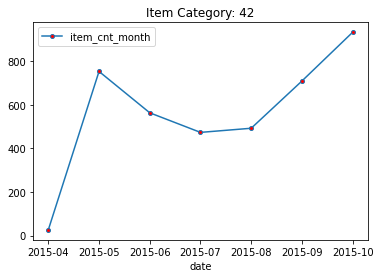

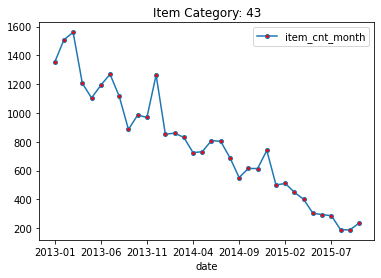

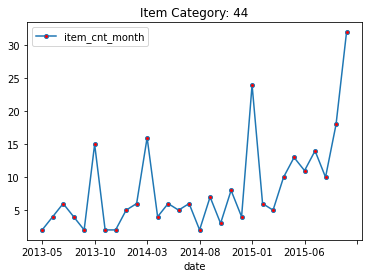

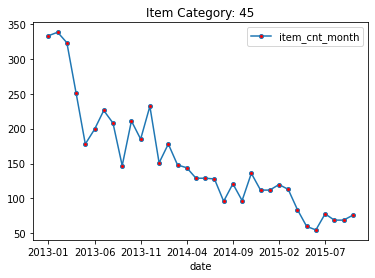

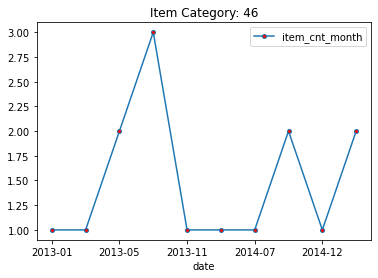

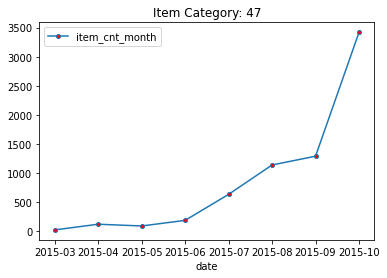

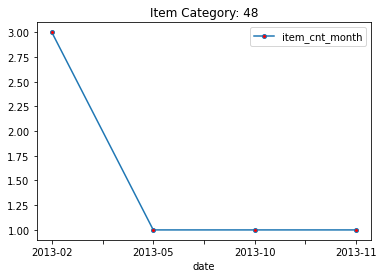

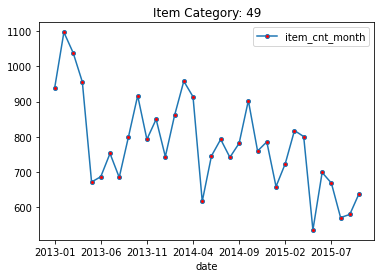

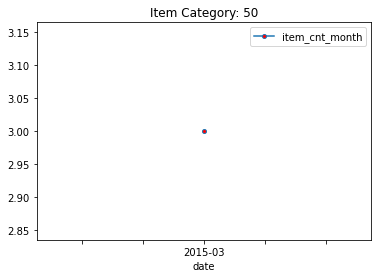

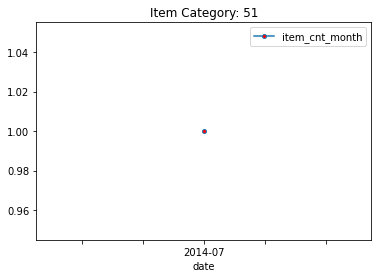

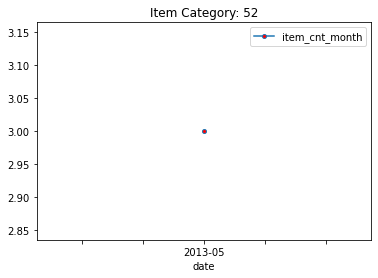

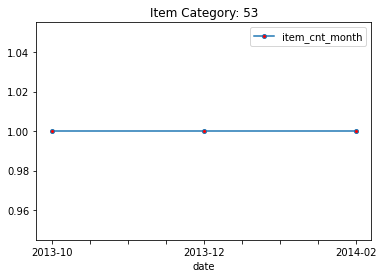

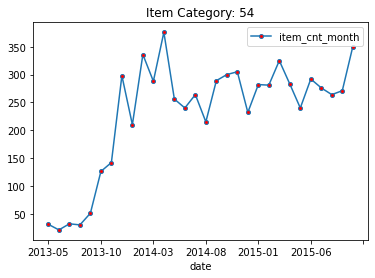

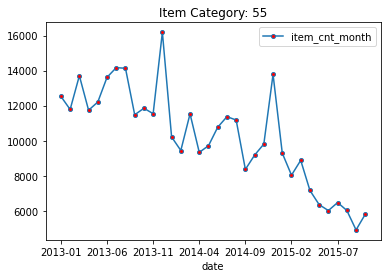

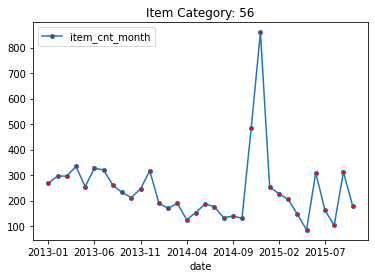

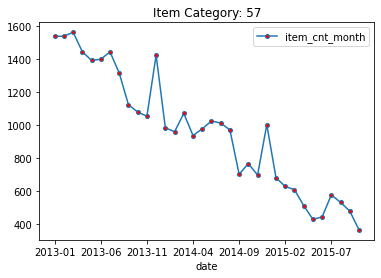

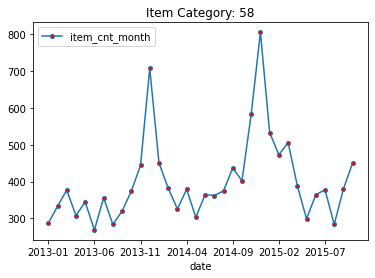

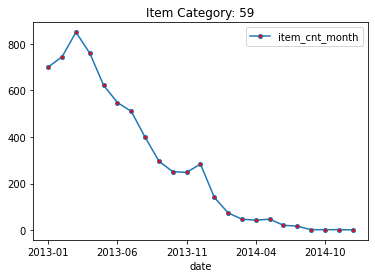

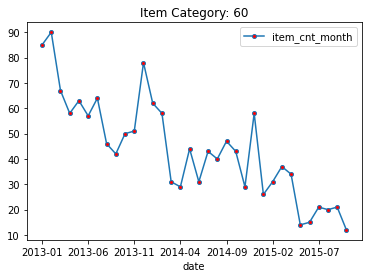

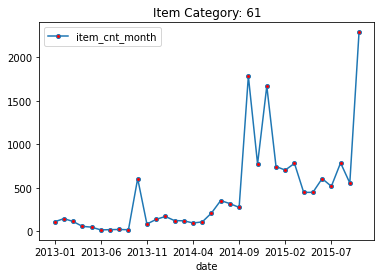

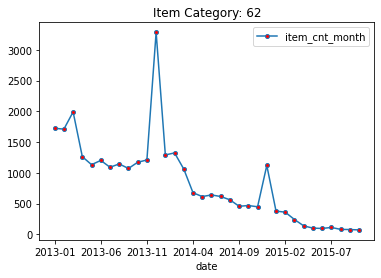

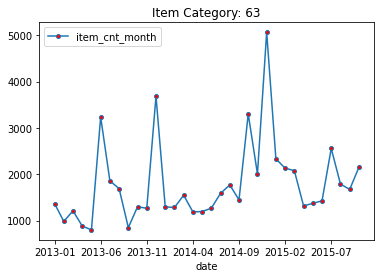

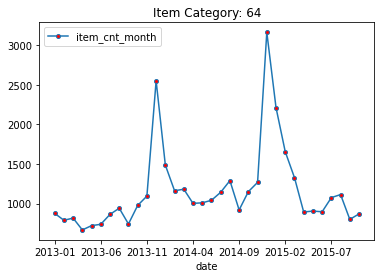

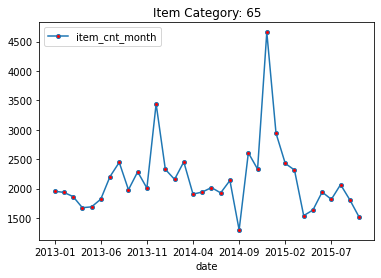

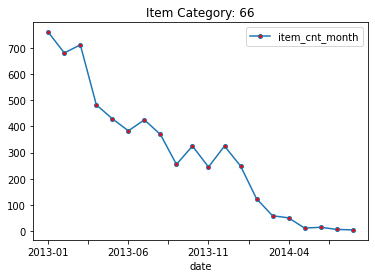

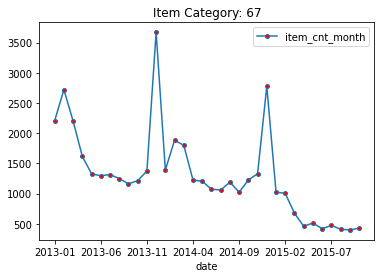

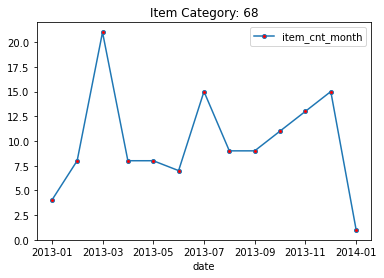

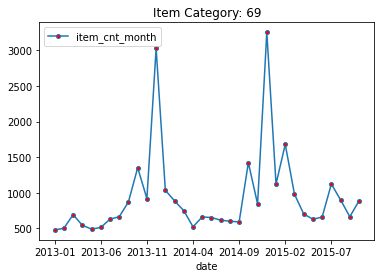

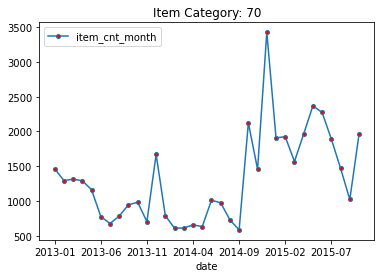

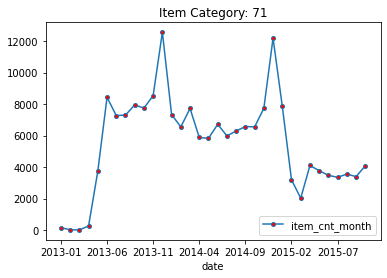

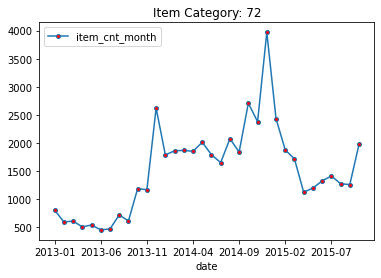

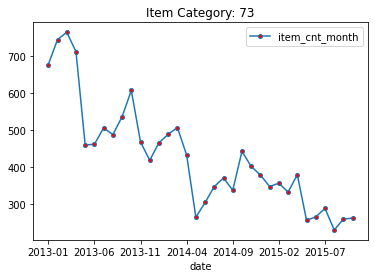

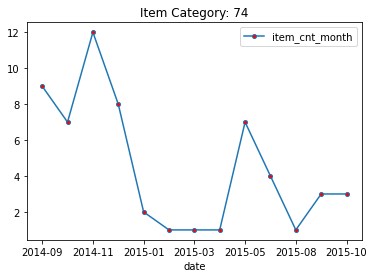

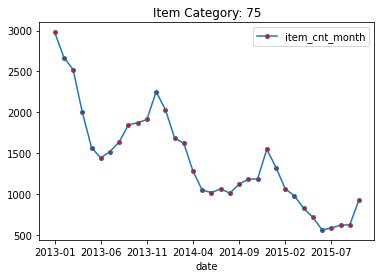

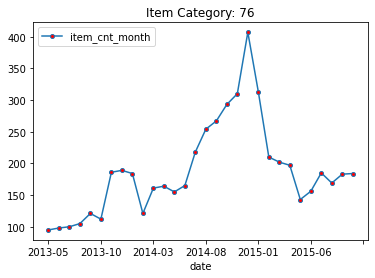

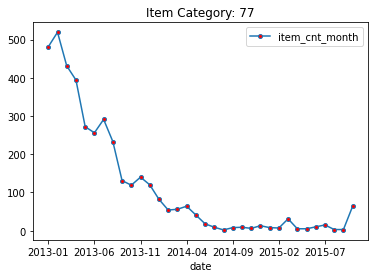

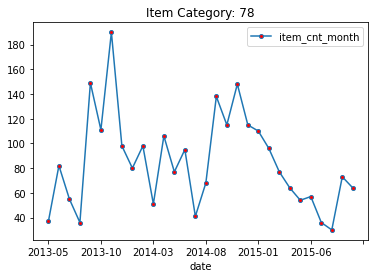

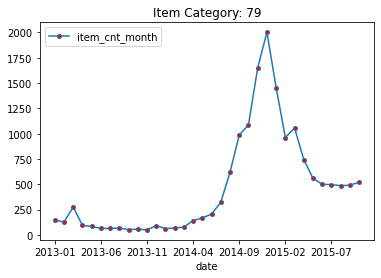

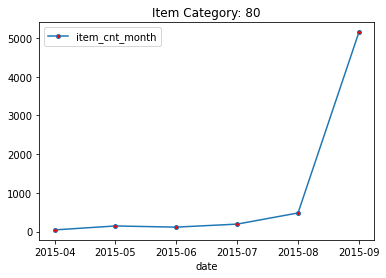

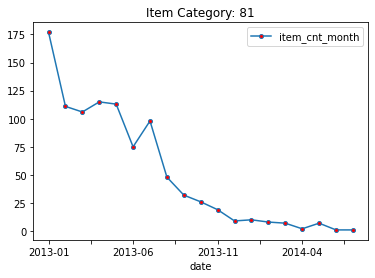

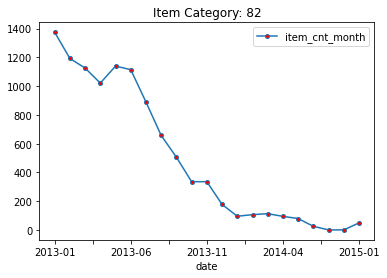

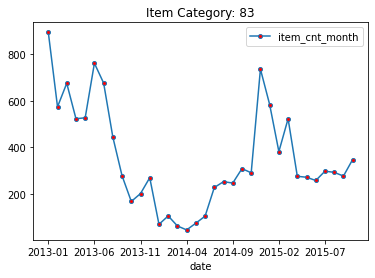

In [9]:
plot_all_sales_per_category()

#### Sales per shop

/Users/ced/opt/miniconda3/envs/rp/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


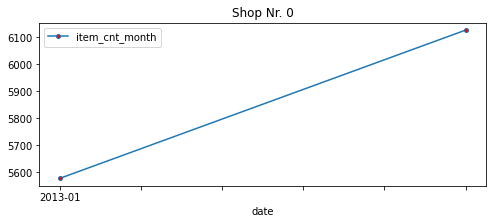

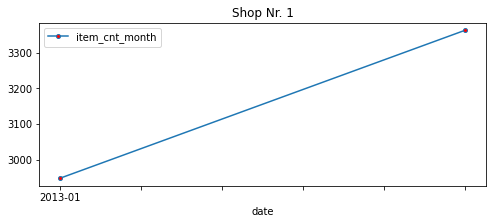

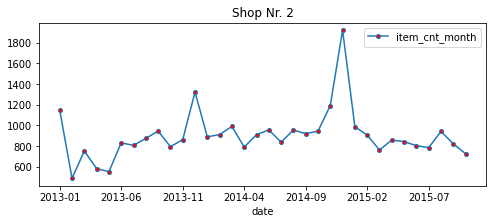

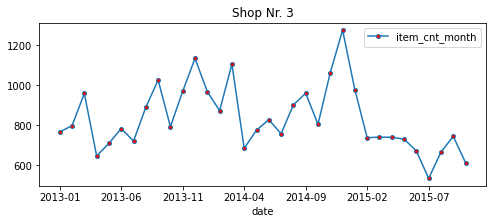

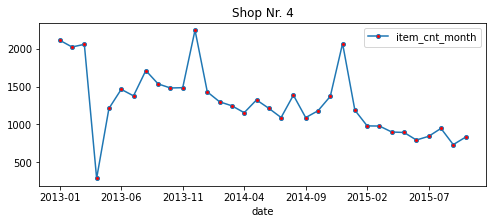

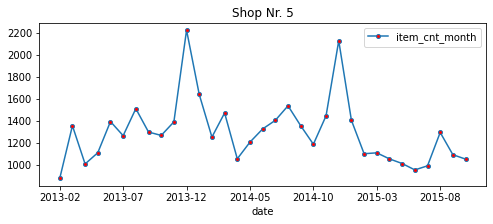

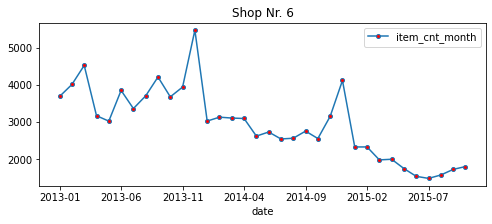

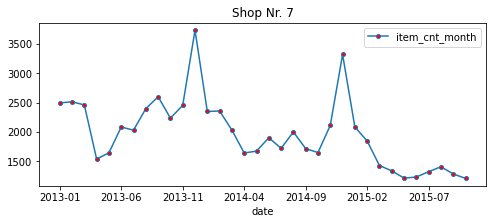

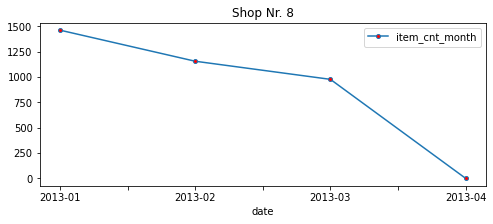

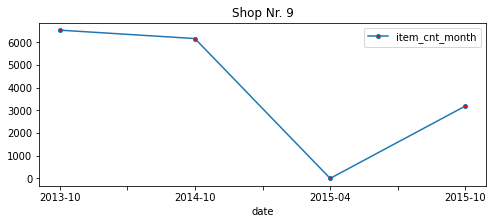

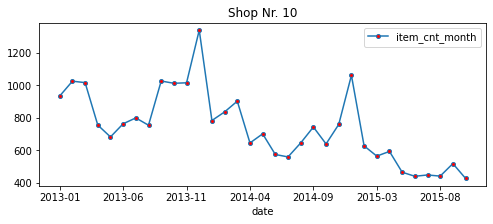

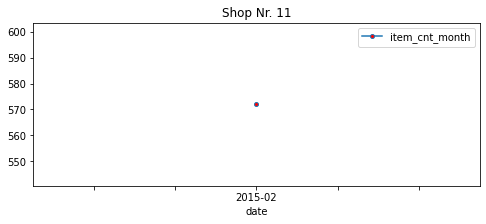

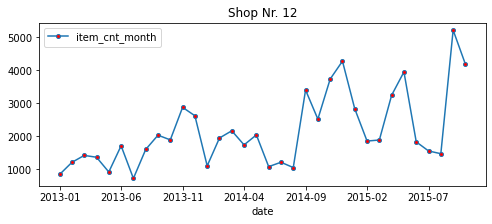

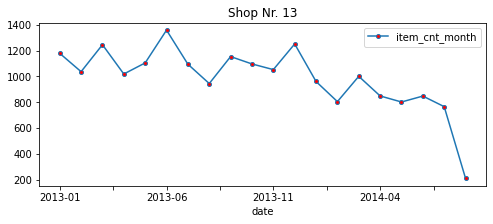

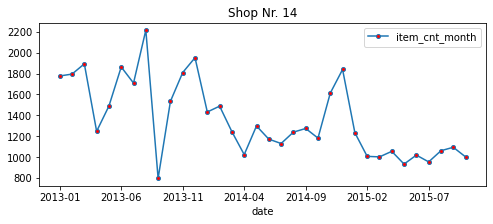

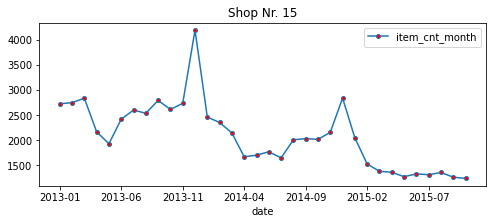

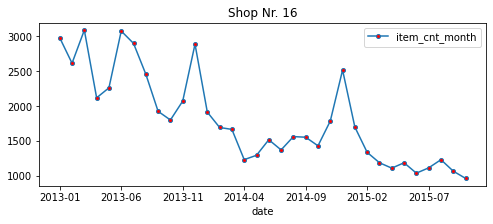

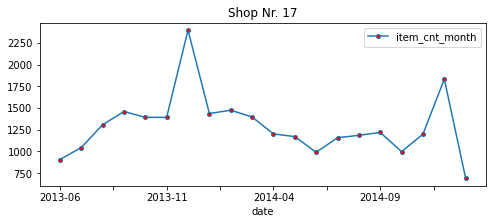

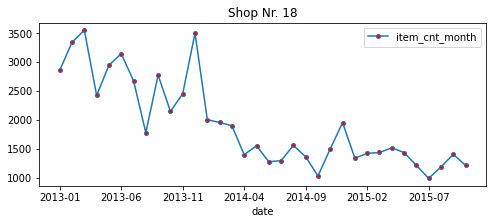

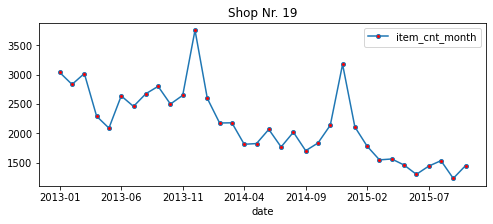

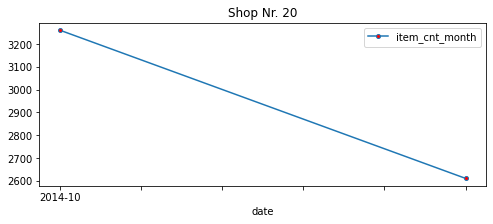

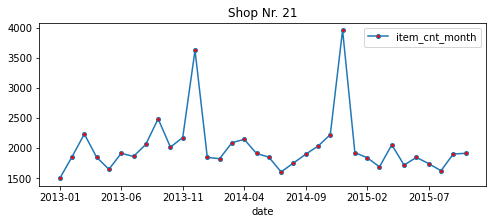

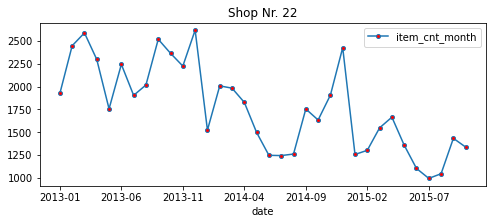

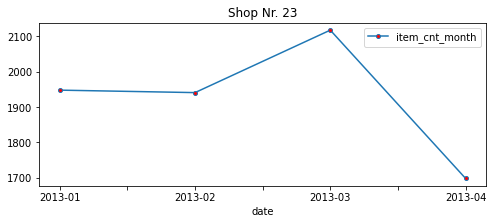

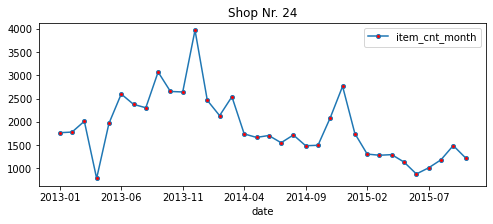

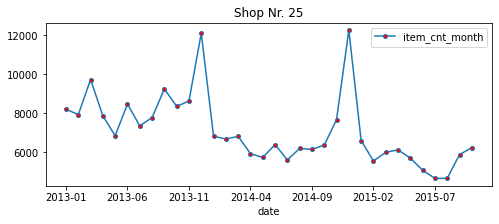

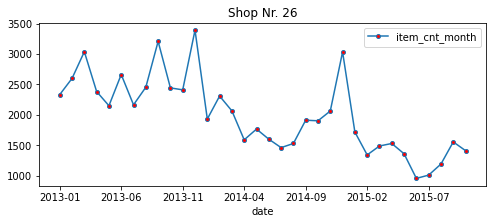

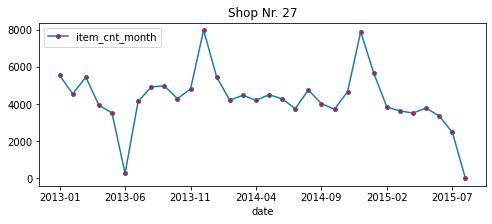

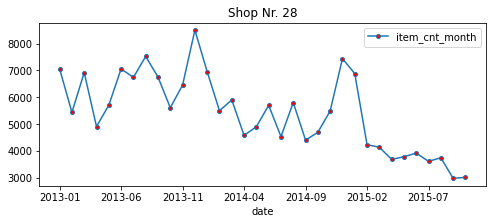

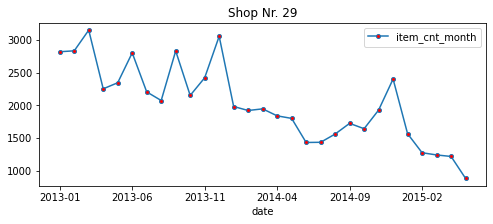

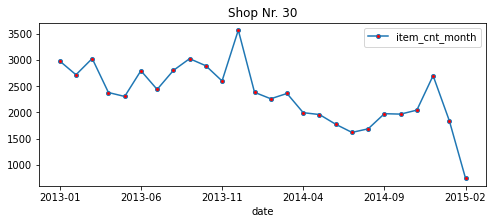

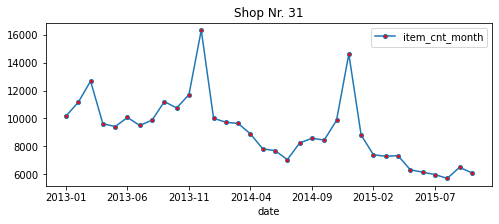

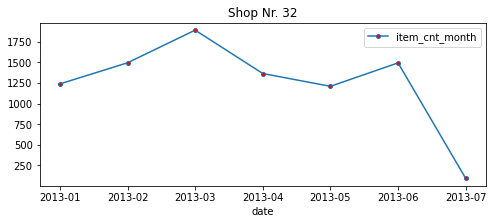

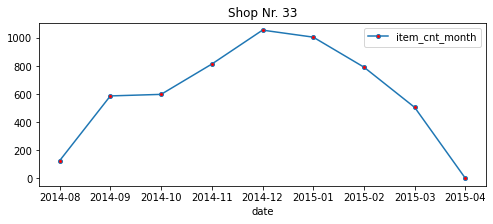

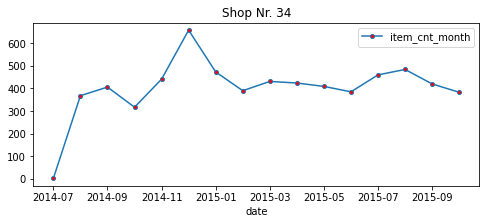

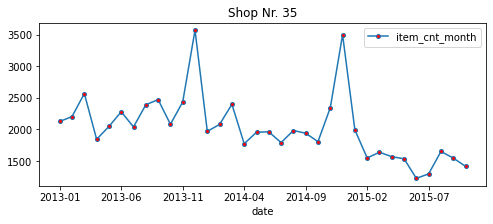

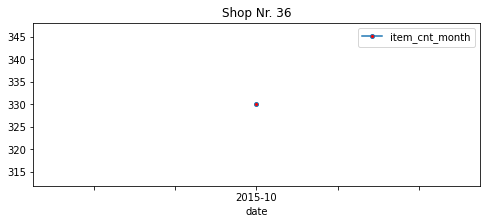

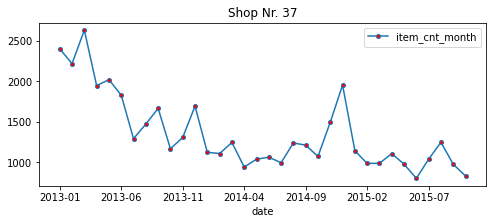

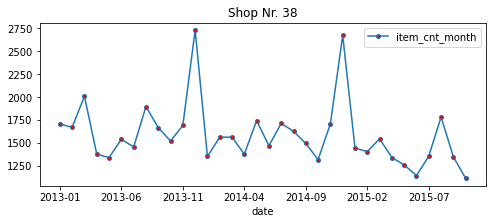

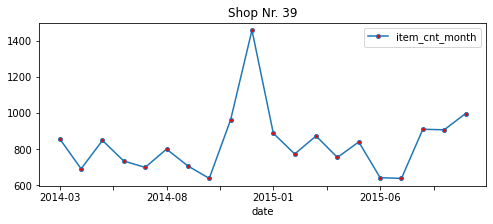

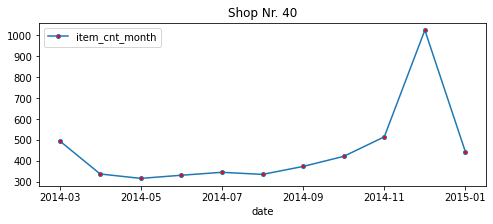

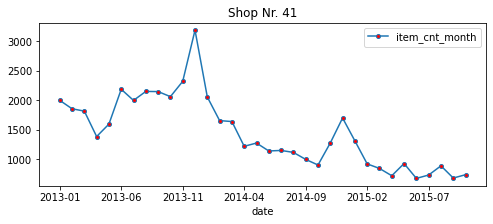

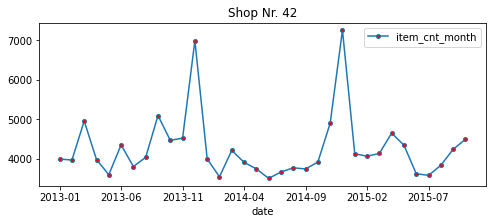

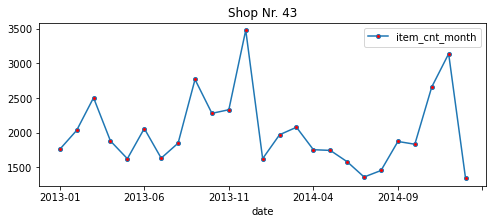

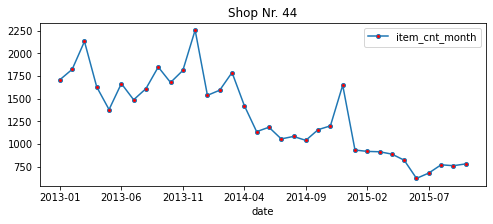

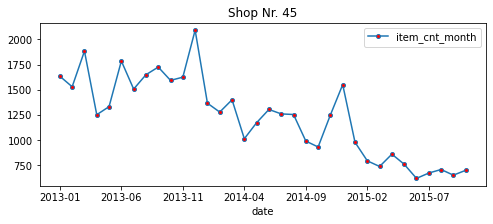

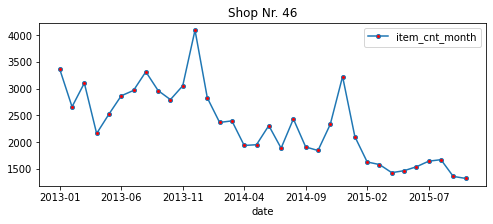

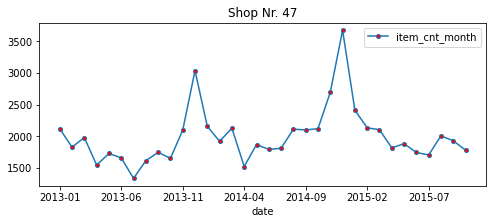

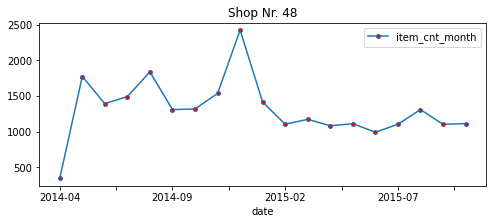

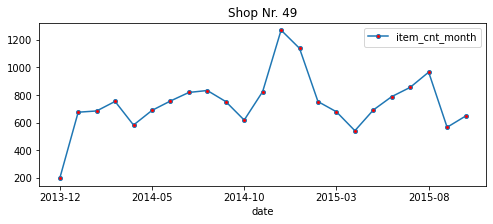

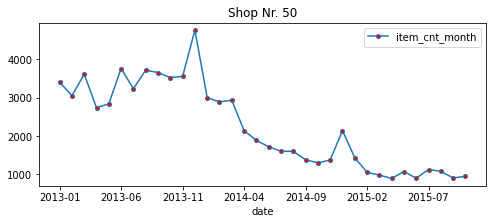

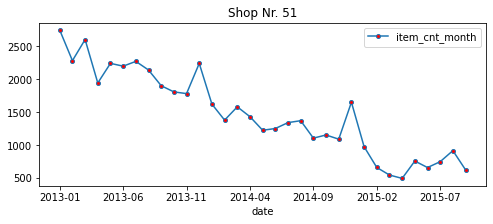

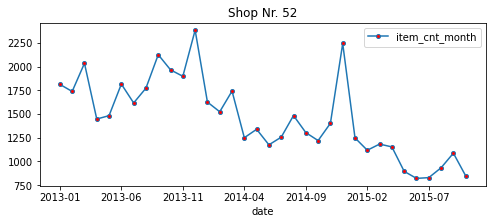

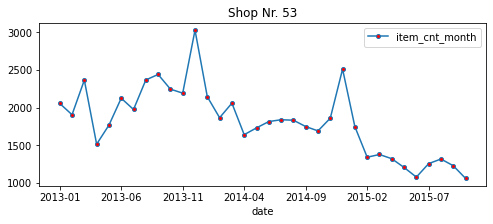

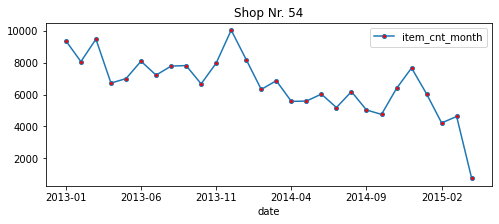

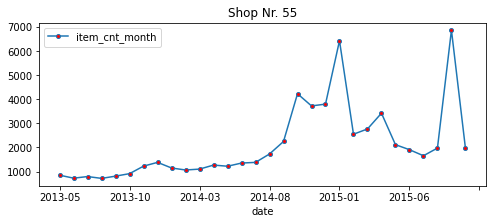

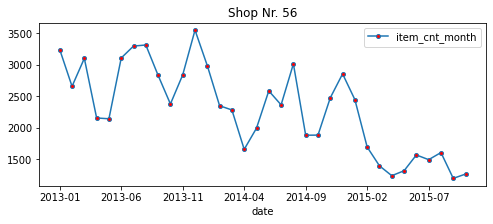

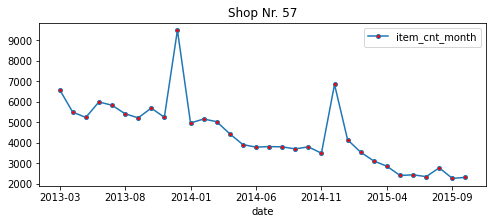

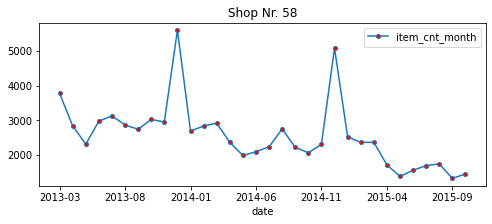

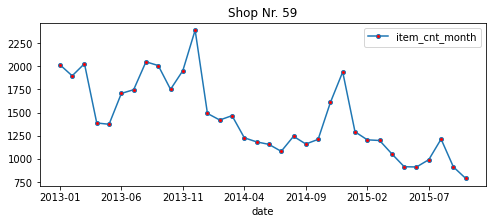

In [10]:
plot_all_sales_per_shop()